In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input

In [2]:
data=pd.read_csv("hotel_bookings.csv")

In [3]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [4]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [7]:
columns=['hotel','children','arrival_date_month','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent','meal','company','customer_type','reservation_status','reservation_status_date']

In [8]:
le=LabelEncoder()

In [9]:
for column in columns:
    data[column]=le.fit_transform(data[column])

In [10]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,333,352,0,2,0.00,0,0,1,668
1,1,0,737,2015,5,27,1,0,0,2,...,0,333,352,0,2,0.00,0,0,1,668
2,1,0,7,2015,5,27,1,0,1,1,...,0,333,352,0,2,75.00,0,0,1,701
3,1,0,13,2015,5,27,1,0,1,1,...,0,220,352,0,2,75.00,0,0,1,701
4,1,0,14,2015,5,27,1,0,2,2,...,0,173,352,0,2,98.00,0,1,1,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,271,352,0,2,96.14,0,0,1,916
119386,0,0,102,2017,1,35,31,2,5,3,...,0,8,352,0,2,225.43,0,2,1,919
119387,0,0,34,2017,1,35,31,2,5,2,...,0,8,352,0,2,157.71,0,4,1,919
119388,0,0,109,2017,1,35,31,2,5,2,...,0,77,352,0,2,104.40,0,0,1,919


In [11]:
null=data.isna().mean()

In [12]:
data.fillna(null)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,333,352,0,2,0.00,0,0,1,668
1,1,0,737,2015,5,27,1,0,0,2,...,0,333,352,0,2,0.00,0,0,1,668
2,1,0,7,2015,5,27,1,0,1,1,...,0,333,352,0,2,75.00,0,0,1,701
3,1,0,13,2015,5,27,1,0,1,1,...,0,220,352,0,2,75.00,0,0,1,701
4,1,0,14,2015,5,27,1,0,2,2,...,0,173,352,0,2,98.00,0,1,1,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,271,352,0,2,96.14,0,0,1,916
119386,0,0,102,2017,1,35,31,2,5,3,...,0,8,352,0,2,225.43,0,2,1,919
119387,0,0,34,2017,1,35,31,2,5,2,...,0,8,352,0,2,157.71,0,4,1,919
119388,0,0,109,2017,1,35,31,2,5,2,...,0,77,352,0,2,104.40,0,0,1,919


In [13]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
data.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,5.490544,27.165173,15.798241,0.927599,2.500302,1.856403,...,0.124893,101.543437,338.498258,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803,443.795846
std,0.472181,0.482918,106.863097,0.707476,3.535075,13.605138,8.780829,0.998613,1.908286,0.579261,...,0.334678,117.689245,58.668979,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776,275.505093
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,8.000000,352.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,194.000000
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,26.000000,352.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000,432.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,0.000000,173.000000,352.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,693.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,2.000000,333.000000,352.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,925.000000


In [26]:
data.shape

(119390, 32)

In [16]:
X=data.drop('adr',axis=1)
y=data['adr']

In [17]:
X

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,333,352,0,2,0,0,1,668
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,333,352,0,2,0,0,1,668
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,333,352,0,2,0,0,1,701
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,220,352,0,2,0,0,1,701
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,173,352,0,2,0,1,1,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,271,352,0,2,0,0,1,916
119386,0,0,102,2017,1,35,31,2,5,3,...,0,0,8,352,0,2,0,2,1,919
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,8,352,0,2,0,4,1,919
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,77,352,0,2,0,0,1,919


In [18]:
y

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [49]:
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=100)

In [50]:
model=Sequential()
model.add(Input(shape=(31,)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1000)              32000     
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dense_15 (Dense)            (None, 100)               50100     
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 587,701
Trainable params: 587,701
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='adam',loss='msle',metrics=['acc'])

In [53]:
H=model.fit(X_train,y_train,epochs=2,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/2
1493/1493 [==============================] - 47s 30ms/step - loss: 0.5407 - acc: 1.2564e-04 - val_loss: 0.4361 - val_acc: 1.2564e-04
Epoch 2/2
1493/1493 [==============================] - 44s 30ms/step - loss: 0.4463 - acc: 1.2564e-04 - val_loss: 0.4105 - val_acc: 1.2564e-04


In [54]:
plt.figure(figsize=(10,2))

<Figure size 1000x200 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

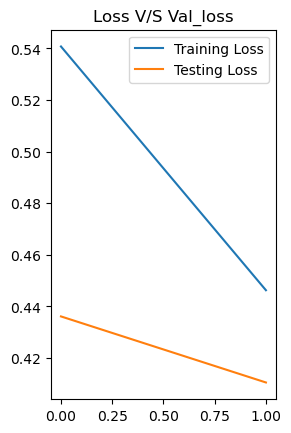

In [59]:
plt.subplot(1,2,1)
plt.plot(H.epoch,H.history['loss'],label='Training Loss')
plt.plot(H.epoch,H.history['val_loss'],label='Testing Loss')
plt.title('Loss V/S Val_loss')
plt.legend()

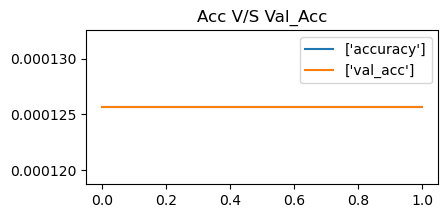

In [64]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(H.epoch,H.history['acc'],label=['accuracy'])
plt.plot(H.epoch,H.history['val_acc'],label=['val_acc'])
plt.title("Acc V/S Val_Acc")
plt.legend()

In [79]:
pred_proba=model.predict(X_test)

747/747 [==============================] - 5s 6ms/step


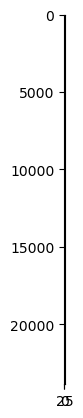

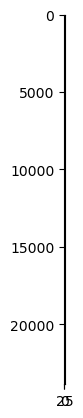

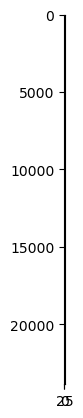

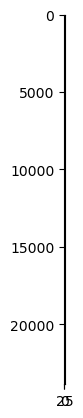

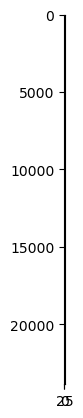

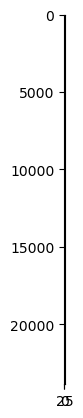

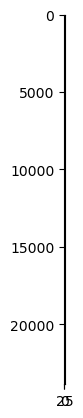

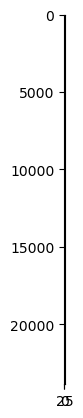

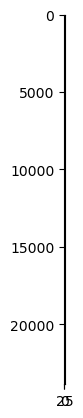

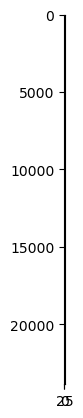

In [ ]:
pred=[]
for proba in pred_proba:
#     pred.append(np.argmax(proba))
      plt.imshow(X_test)
      plt.show()